In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import ccsds
import tianwen1_tm

import collections

In [2]:
def get_timestamps(aos):
    return np.array([tianwen1_tm.parse_timestamp_datetime64(a.insert_zone.timestamp) for a in aos])

def get_packet_timestamps(packets):
    return np.array([tianwen1_tm.parse_timestamp_datetime64(p[1]) for p in packets])

def get_packet(p):
    return p[0] if type(p) is tuple else p

def packets_asarray(packets):
    return np.array([np.frombuffer(get_packet(p)[ccsds.SpacePacketPrimaryHeader.sizeof():], 'uint8')
                     for p in packets])

def plot_apids(apids, sc, vc):
    for apid in sorted(apids.keys()):
        plt.figure(figsize = (16,16), facecolor = 'w')
        ps = packets_asarray(apids[apid])
        plt.imshow(ps, aspect = ps.shape[1]/ps.shape[0])
        plt.title(f'APID {apid} Spacecraft {sc} Virtual channel {vc}')

In [3]:
frame_size_full = 892+32*4+4
frame_size = 892
frames = np.fromfile('tcm1_hsd/20200802_220847_3124943cut2.frm', dtype = 'uint8').reshape((-1,frame_size_full))
frames = frames[:,4:4+frame_size]
frames.shape[0]

230664

In [4]:
aos = [ccsds.AOSFrame.parse(f) for f in frames]

In [5]:
collections.Counter([a.primary_header.transfer_frame_version_number for a in aos])

Counter({1: 230664})

In [6]:
collections.Counter([a.primary_header.spacecraft_id for a in aos])

Counter({245: 230664})

In [7]:
collections.Counter([a.primary_header.virtual_channel_id for a in aos])

Counter({3: 4986, 1: 922, 24: 224756})

In [8]:
vcs = [1,3,24]
aos_by_vc = {vc : [a for a in aos if a.primary_header.virtual_channel_id == vc]
                         for vc in vcs}

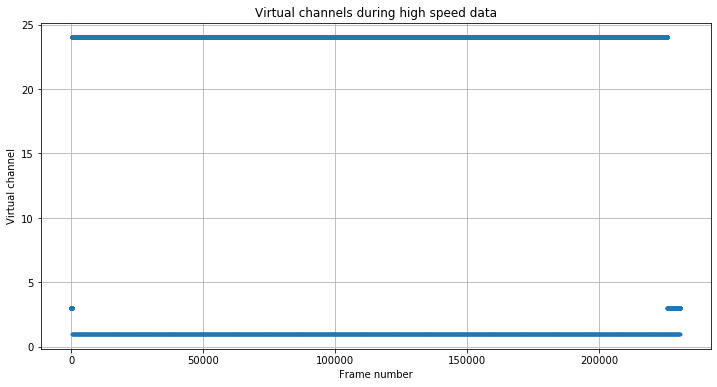

In [9]:
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot([a.primary_header.virtual_channel_id for a in aos if a.primary_header.virtual_channel_id in vcs], '.')
plt.title('Virtual channels during high speed data')
plt.xlabel('Frame number')
plt.ylabel('Virtual channel')
plt.grid()

## Virtual channel 1

In [10]:
get_timestamps(aos_by_vc[1])

array(['2020-08-03T01:29:59.759700', '2020-08-03T01:30:00.759700',
       '2020-08-03T01:30:01.763900', '2020-08-03T01:30:02.759900',
       '2020-08-03T01:30:03.763800', '2020-08-03T01:30:04.759800',
       '2020-08-03T01:30:05.759700', '2020-08-03T01:30:06.760000',
       '2020-08-03T01:30:07.759900', '2020-08-03T01:30:08.759800',
       '2020-08-03T01:30:09.763800', '2020-08-03T01:30:10.759700',
       '2020-08-03T01:30:11.763900', '2020-08-03T01:30:12.759800',
       '2020-08-03T01:30:13.763800', '2020-08-03T01:30:14.759700',
       '2020-08-03T01:30:15.763600', '2020-08-03T01:30:16.759900',
       '2020-08-03T01:30:17.763800', '2020-08-03T01:30:18.759700',
       '2020-08-03T01:30:19.759700', '2020-08-03T01:30:20.759600',
       '2020-08-03T01:30:21.763900', '2020-08-03T01:30:22.759900',
       '2020-08-03T01:30:23.759800', '2020-08-03T01:30:24.759700',
       '2020-08-03T01:30:25.763700', '2020-08-03T01:30:26.759800',
       '2020-08-03T01:30:27.763800', '2020-08-03T01:30:28.7597

## Virtual channel 24

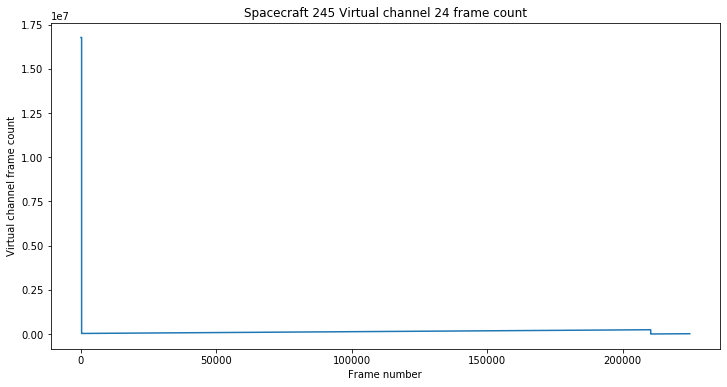

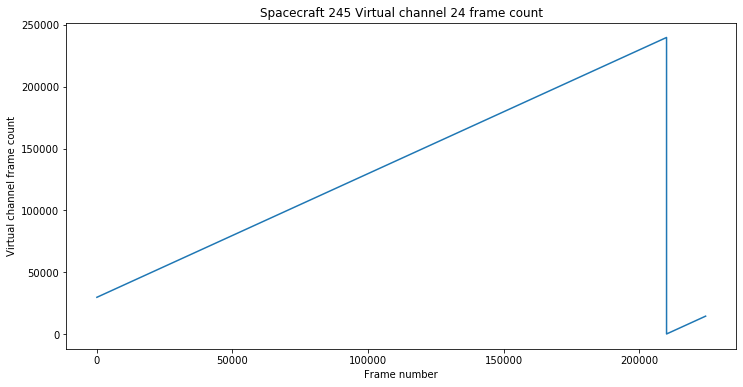

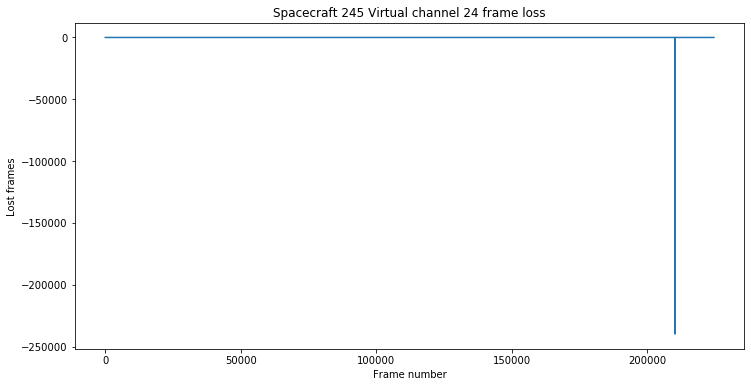

In [11]:
fc = np.array([a.primary_header.virtual_channel_frame_count for a in aos_by_vc[24]])

plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(fc)
plt.title('Spacecraft 245 Virtual channel 24 frame count')
plt.ylabel('Virtual channel frame count')
plt.xlabel('Frame number');

plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(fc[fc != 16777215])
plt.title('Spacecraft 245 Virtual channel 24 frame count')
plt.ylabel('Virtual channel frame count')
plt.xlabel('Frame number');

plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(np.diff(fc[fc != 16777215]) - 1)
plt.title('Spacecraft 245 Virtual channel 24 frame loss')
plt.ylabel('Lost frames')
plt.xlabel('Frame number');

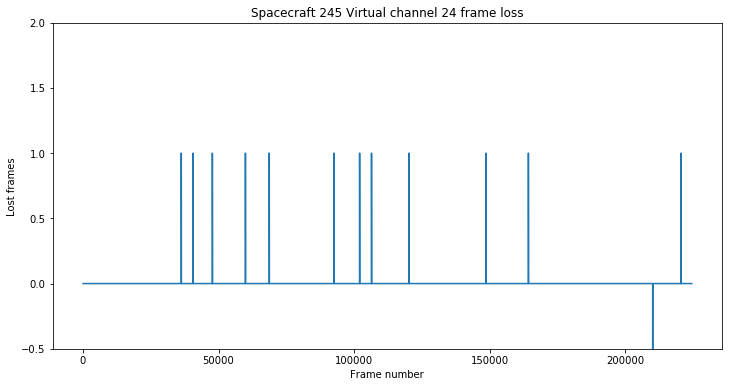

In [12]:
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(np.diff(fc[fc != 16777215]) - 1)
plt.title('Spacecraft 245 Virtual channel 24 frame loss')
plt.ylabel('Lost frames')
plt.xlabel('Frame number')
plt.ylim((-0.5,2));

In [13]:
[a.primary_header for a in aos_by_vc[24][:10]]

[Container(transfer_frame_version_number=1, spacecraft_id=245, virtual_channel_id=24, virtual_channel_frame_count=16777215, replay_flag=True, vc_frame_count_usage_flag=False, rsvd_spare=0, vc_framecount_cycle=0),
 Container(transfer_frame_version_number=1, spacecraft_id=245, virtual_channel_id=24, virtual_channel_frame_count=16777215, replay_flag=True, vc_frame_count_usage_flag=False, rsvd_spare=0, vc_framecount_cycle=0),
 Container(transfer_frame_version_number=1, spacecraft_id=245, virtual_channel_id=24, virtual_channel_frame_count=16777215, replay_flag=True, vc_frame_count_usage_flag=False, rsvd_spare=0, vc_framecount_cycle=0),
 Container(transfer_frame_version_number=1, spacecraft_id=245, virtual_channel_id=24, virtual_channel_frame_count=16777215, replay_flag=True, vc_frame_count_usage_flag=False, rsvd_spare=0, vc_framecount_cycle=0),
 Container(transfer_frame_version_number=1, spacecraft_id=245, virtual_channel_id=24, virtual_channel_frame_count=16777215, replay_flag=True, vc_fra

In [14]:
[a.primary_header for a in aos_by_vc[24][218:225]]

[Container(transfer_frame_version_number=1, spacecraft_id=245, virtual_channel_id=24, virtual_channel_frame_count=16777215, replay_flag=True, vc_frame_count_usage_flag=False, rsvd_spare=0, vc_framecount_cycle=0),
 Container(transfer_frame_version_number=1, spacecraft_id=245, virtual_channel_id=24, virtual_channel_frame_count=16777215, replay_flag=True, vc_frame_count_usage_flag=False, rsvd_spare=0, vc_framecount_cycle=0),
 Container(transfer_frame_version_number=1, spacecraft_id=245, virtual_channel_id=24, virtual_channel_frame_count=29660, replay_flag=True, vc_frame_count_usage_flag=False, rsvd_spare=0, vc_framecount_cycle=0),
 Container(transfer_frame_version_number=1, spacecraft_id=245, virtual_channel_id=24, virtual_channel_frame_count=29661, replay_flag=True, vc_frame_count_usage_flag=False, rsvd_spare=0, vc_framecount_cycle=0),
 Container(transfer_frame_version_number=1, spacecraft_id=245, virtual_channel_id=24, virtual_channel_frame_count=29662, replay_flag=True, vc_frame_count_

In [15]:
vc24_frames = np.stack([f for a,f in zip(aos, frames) if a.primary_header.virtual_channel_id == 24])

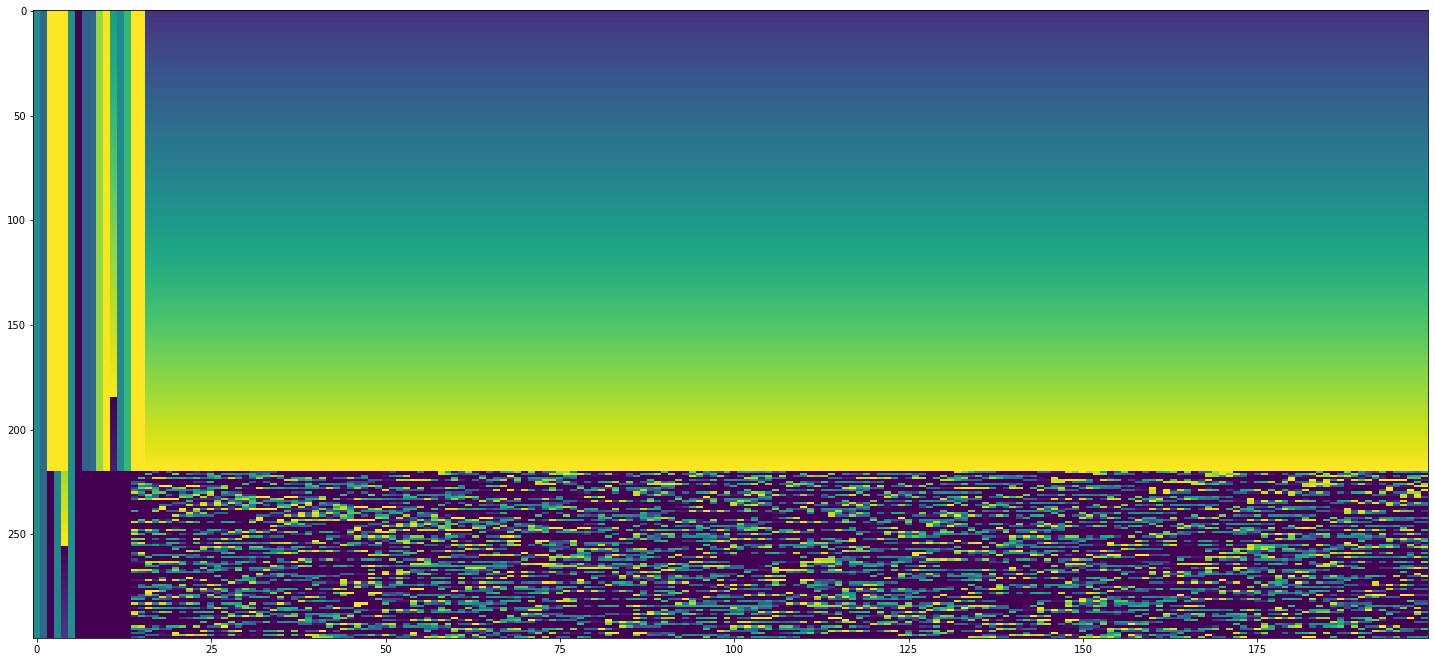

In [16]:
plt.figure(figsize = (25,25))
plt.imshow(vc24_frames[:300, :200], aspect = 0.3)

In [17]:
segment_sync = bytes.fromhex('eb90')
segments = bytes(vc24_frames[220:, 14:].ravel()).split(segment_sync)[1:]

In [18]:
lengths = [len(s) for s in segments]
length_count = collections.Counter(lengths)
length_count

Counter({92: 1509825,
         54: 54,
         24: 178496,
         174: 192955,
         74: 48292,
         70: 178366,
         72: 93,
         14: 123,
         2: 222,
         90: 63,
         0: 63,
         88: 92,
         73: 18,
         17: 18,
         16: 53,
         8: 36,
         164: 4,
         82: 23,
         89: 27,
         1: 27,
         66: 33,
         20: 28,
         15: 17,
         75: 17,
         170: 9,
         146: 4,
         160: 3,
         52: 2,
         58: 40,
         32: 40,
         60: 2,
         62: 23,
         28: 23,
         132: 3,
         40: 22,
         36: 31,
         69: 371,
         21: 371,
         31: 20,
         59: 20,
         42: 1,
         26: 1,
         50: 18,
         128: 1,
         76: 27,
         46: 4,
         120: 1,
         34: 2,
         126: 3,
         64: 1,
         48: 1,
         57: 146,
         33: 146,
         38: 1})

In [19]:
for length in length_count.keys():
    np.save(f'hsd_cut2/segments_size_{length}.npy', np.array([np.frombuffer(s, 'uint8') for s in segments
                                                             if len(s) == length]))